<a href="https://colab.research.google.com/github/GiftMtambo/Portfolio-Projects/blob/main/EDA%20for%20Covid-19%20using%20SQL%20and%20Python/covid_19(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS(EDA) FOR COVID 19 VACCINE USING SQL AND PYTHON

<img src='https://github.com/GiftMtambo/Portfolio-Projects/blob/main/EDA%20for%20Covid-19%20using%20SQL%20and%20Python/covid_191.jpg?raw=1' style="width:900px;height:600px"/>

<h3 style = "font-family: cursive;background-color:#ff99cc	">Objectives </h3>

* Which country is using what vaccine?
* In which country the vaccination programme is more advanced?
* Where are vaccinated more people per day? But in terms of percent from entire population ?
* Analyse the datasets to determine which machine learning model is accurate for prediction.


<h3 style = "font-family: cursive;background-color:#ff99cc	">Dataset Information: </h3>
  
* Data is collected daily from this website [Our World in Data](https://ourworldindata.org/) GitHub repository for [covid-19](https://github.com/owid/covid-19-data), merged and uploaded.

**The characteristics variables includes the following**

1. **Country**- this is the country for which the vaccination information is provided;
2. **Country ISO Code**- ISO code for the country;
3. **Date** - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
4. **Total number of vaccinations**- this is the absolute number of total immunizations in the country;
5. **Total number of people vaccinated**- a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
6. **Total number of people fully vaccinated**- this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
7. **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;
8. **Daily vaccinations**- for a certain data entry, the number of vaccination for that date/country;
9. **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;*
10. **Total number of people vaccinated per hundred**- ratio (in percent) between population immunized and total population up to the date in the country;
11. **Total number of people fully vaccinated per hundred**- ratio (in percent) between population fully immunized and total population up to the date in the country;
12. **Number of vaccinations per day**- number of daily vaccination for that day and country;
13. **Daily vaccinations per million**- ratio (in ppm) between vaccination number and total population for the current date in the country;
14. **Vaccines used in the country**- total number of vaccines used in the country (up to date);
15. **Source name**- source of the information (national authori

<h3 style = "font-family: cursive;background-color:#ff99cc	">2.Loading and Checking the dataset: </h3>

In [1]:
#load the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sqlite3, csv
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files

In [4]:
uploaded= files.upload()

Saving country_vaccinations.csv to country_vaccinations.csv
Saving population_by_country_2020.csv to population_by_country_2020.csv


In [5]:
#load the dataset
df1= pd.read_csv("country_vaccinations.csv")
df2 = pd.read_csv("population_by_country_2020.csv")

In [6]:
#check the columns
print(df1.columns)

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')


In [7]:
# display the dimesions of the dataset
df1.shape 

(5321, 15)

In [8]:
# display the dataset info.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5321 entries, 0 to 5320
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              5321 non-null   object 
 1   iso_code                             4989 non-null   object 
 2   date                                 5321 non-null   object 
 3   total_vaccinations                   3384 non-null   float64
 4   people_vaccinated                    2990 non-null   float64
 5   people_fully_vaccinated              2039 non-null   float64
 6   daily_vaccinations_raw               2845 non-null   float64
 7   daily_vaccinations                   5137 non-null   float64
 8   total_vaccinations_per_hundred       3384 non-null   float64
 9   people_vaccinated_per_hundred        2990 non-null   float64
 10  people_fully_vaccinated_per_hundred  2039 non-null   float64
 11  daily_vaccinations_per_million

In [9]:
#display the dataset
df1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,1/10/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,1/11/2021,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,1/12/2021,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,1/13/2021,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,1/14/2021,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


<h3 style = "font-family: cursive;background-color:#ff99cc	">3.Data Cleaning And Analysis: </h3>

In [10]:
#checking for the duplicates 
dup = df1.duplicated().sum()
print('Any Duplicate Value:',dup)


Any Duplicate Value: 0


In [11]:
#checking for missing values 
df1.isnull().sum()

country                                   0
iso_code                                332
date                                      0
total_vaccinations                     1937
people_vaccinated                      2331
people_fully_vaccinated                3282
daily_vaccinations_raw                 2476
daily_vaccinations                      184
total_vaccinations_per_hundred         1937
people_vaccinated_per_hundred          2331
people_fully_vaccinated_per_hundred    3282
daily_vaccinations_per_million          184
vaccines                                  0
source_name                               6
source_website                            0
dtype: int64

**Observations**
- We can see that there is a lot of missing data 

In [12]:
#converting date column to date format
df1['date'] = pd.to_datetime(df1['date']).dt.date 
df1.head(4)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


<h3 style = "font-family: cursive;background-color:#ff99cc	">SQL Analysis </h3>

In [13]:
# Converting CSV using pandas.DataFrame.to_sql
engine = create_engine('sqlite://',  echo = False) 
df2.to_sql('df2_sql', con = engine)
df1.to_sql('df1_sql', con = engine)

In [14]:
sql_query = '''SELECT name FROM sqlite_master WHERE type='table';'''

In [15]:
# Creating subtable
sql_query = """
            SELECT DISTINCT country, vaccines
            FROM df1_sql
            ORDER BY country
            """
country_vaccines = pd.read_sql_query(sql_query, con = engine)

# Stats per country
# Total Vaccinations
sql_query = """
            SELECT DISTINCT country, MAX(total_vaccinations) AS total_vaccinations
            FROM df1_sql
            GROUP BY country
            ORDER BY total_vaccinations DESC
            """
total = pd.read_sql_query(sql_query, con = engine)
sql_query = """
            SELECT DISTINCT country, MAX(total_vaccinations) AS total_vaccinations
            FROM df1_sql
            GROUP BY country
            ORDER BY total_vaccinations DESC
            LIMIT 10
            """
top10_total = pd.read_sql_query(sql_query, con = engine)

# People fully vaccinated
sql_query = """
            SELECT DISTINCT country, MAX(people_fully_vaccinated) AS people_fully_vaccinated
            FROM df1_sql
            GROUP BY country
            ORDER BY people_fully_vaccinated DESC
            LIMIT 10
            """
top10_people_full = pd.read_sql_query(sql_query, con = engine)

sql_query = """
            SELECT DISTINCT country, MAX(people_fully_vaccinated) AS people_fully_vaccinated
            FROM df1_sql
            GROUP BY country
            ORDER BY people_fully_vaccinated DESC
            """
people_full = pd.read_sql_query(sql_query, con = engine)


sql_query = """
            SELECT DISTINCT country, MAX(people_vaccinated) AS people_vaccinated
            FROM df1_sql
            GROUP BY country
            ORDER BY people_vaccinated DESC
            LIMIT 10
            """
top10_people = pd.read_sql_query(sql_query, con = engine)

# Daily vaccinations
sql_query = """
            SELECT DISTINCT country, MAX(daily_vaccinations) AS daily_vaccinations
            FROM df1_sql
            GROUP BY country
            ORDER BY daily_vaccinations DESC
            """
daily = pd.read_sql_query(sql_query, con = engine)

sql_query = """
            SELECT DISTINCT country, MAX(daily_vaccinations) AS daily_vaccinations
            FROM df1_sql
            GROUP BY country
            ORDER BY daily_vaccinations DESC
            LIMIT 10
            """
top10_daily = pd.read_sql_query(sql_query, con = engine)

# Joining 'Population (2020)' from 'populaiton_by_country'
sql_query = """
            SELECT df1_sql.*, df2_sql.'Population (2020)' AS population
            FROM df1_sql 
            INNER JOIN df2_sql 
                ON df2_sql.'Country (or dependency)' = df1_sql.country
            """
vaccinations_population = pd.read_sql_query(sql_query, con = engine)

In [16]:
vaccinations_population.to_sql('vaccinations_population', con = engine)  

In [17]:
# Percentage of populaiton vaccinated
sql_query = """
            SELECT DISTINCT country, (MAX(people_vaccinated)/MAX(population))*100 AS percentage_vaccinated
            FROM vaccinations_population
            GROUP BY country
            ORDER BY percentage_vaccinated DESC
            LIMIT 15;
            """
percent_vaccinated = pd.read_sql_query(sql_query, con = engine)

sql_query = """
            SELECT DISTINCT country, (MAX(people_fully_vaccinated)/MAX(population))*100 AS 'fully_vaccinated_(%)'
            FROM vaccinations_population
            WHERE people_fully_vaccinated > 0
            GROUP BY country
            ORDER BY 'fully_vaccinated_(%)' DESC
            """
percent_fully_vaccinated = pd.read_sql_query(sql_query, con = engine)

In [18]:
# Estimated number of days until 100% population is vaccinated
sql_query = """
            SELECT DISTINCT country, ((MAX(population) - MAX(people_fully_vaccinated))/MAX(daily_vaccinations))*
               (MAX(total_vaccinations)/MAX(people_fully_vaccinated)) AS estimated_days_until_100_percent_vaccinations
            FROM vaccinations_population
            WHERE people_fully_vaccinated > 0
            GROUP BY country
            ORDER BY 'fully_vaccinated_(%)' DESC
            """
estimated_days_until_100_percent_vaccinations = pd.read_sql_query(sql_query, con = engine)

<h3 style = "font-family: cursive;background-color:#ff99cc">Vaccine Analysis </h3>

In [19]:
# Splitting strings in 'vaccines'
country_vaccines['vaccines']=[i.rsplit(',',3)[0] for i in country_vaccines['vaccines']]
country_vaccines['vaccines'].head(4)

0       Pfizer/BioNTech
1             Sputnik V
2       Pfizer/BioNTech
3    Oxford/AstraZeneca
Name: vaccines, dtype: object

In [20]:
# Vaccines used in each country
country_vaccines

,country,vaccines
0,Albania,Pfizer/BioNTech
1,Algeria,Sputnik V
2,Andorra,Pfizer/BioNTech
3,Anguilla,Oxford/AstraZeneca
4,Argentina,Sputnik V
...,...,...
120,United States,Moderna
121,Uruguay,Sinovac
122,Venezuela,Sputnik V
123,Wales,Oxford/AstraZeneca


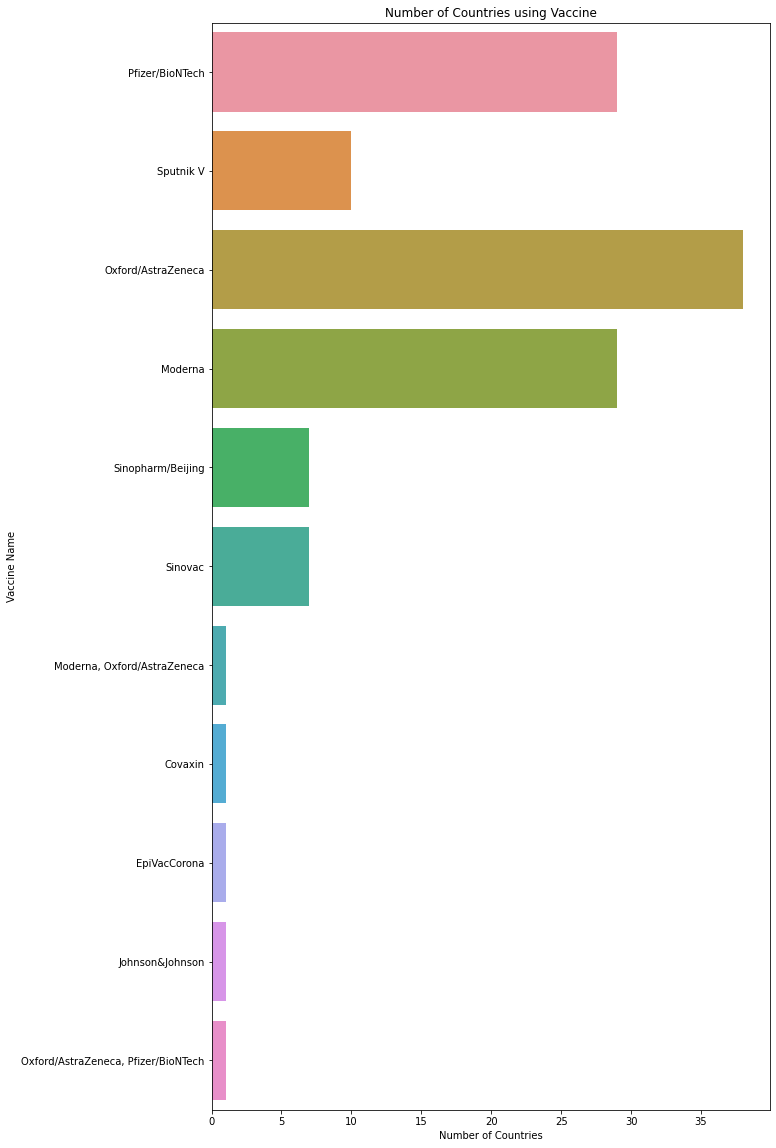

In [21]:
# Populatiry of each vaccine (1 per country)
plt.figure(figsize=(10,20))
sns.countplot(y =country_vaccines['vaccines'])
plt.title('Number of Countries using Vaccine')
plt.ylabel('Vaccine Name')
plt.xlabel('Number of Countries');

<h3 style = "font-family: cursive;background-color:#ff99cc"> Data Visualisation </h3>

### People Vaccinated 

In [22]:
fig = go.Figure(data=[go.Scatter(
    x=top10_people['country'], y=top10_people['people_vaccinated'],
    mode='markers',
    marker=dict(
        color=top10_people['people_vaccinated'],
        size=top10_people['people_vaccinated']*0.000005,
        showscale=True
    ))])

fig.update_layout(title='Top 10 Countries with People Vaccinated',xaxis_title="Country",yaxis_title="People Vaccinated",title_x=0.5)
fig.show()

In [23]:
fig = go.Figure(go.Funnel(
    x=percent_vaccinated["percentage_vaccinated"],
    y=percent_vaccinated["country"] ))
fig.update_layout(title='Top 10 Countries with Highest Percent of Population Vaccinated (%)',yaxis_title="Country",xaxis_title=" Percent of Population Vaccinated ",title_x=0.5)
fig.show()

#### People Fully Vaccinated

In [24]:
# Creating function to get the name of the dataframe
def get_df_name(data):
    name =[x for x in globals() if globals()[x] is data][0]
    return name

In [25]:
def auto_plot(target_column, data, title, figsize=(20,10)):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=data['country'], y = data[target_column])
    plt.title('Top 10 Countries for {}'.format(title))
    plt.xlabel('Country')

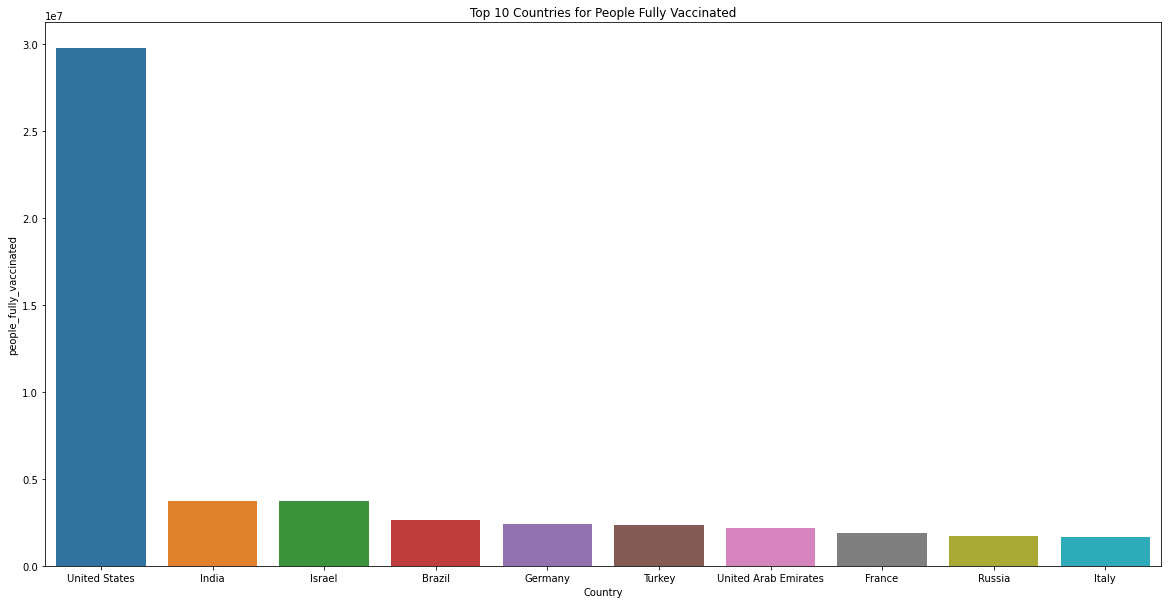

In [26]:
auto_plot('people_fully_vaccinated', top10_people_full, title='People Fully Vaccinated')